In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as pe

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Setting Matplotlib defaults
plt.style.use('seaborn-v0_8')
# Set Matplotlib defaults
plt.rc('figure', figsize=(8,8), dpi=200)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=15, titlepad=10)
plt.rc('animation', html='html5')
plt.tight_layout()

/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv


<Figure size 1600x1600 with 0 Axes>

In [2]:
df = pd.read_csv('/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv')

## Data Understanding

In [3]:
df.shape

(973, 15)

In [4]:
df.sample(10)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
955   32    Male        102.8        1.98      168      120           61   
747   33    Male         45.9        1.89      193      144           50   
694   45  Female         57.2        1.55      194      121           58   
18    47  Female         66.8        1.75      199      146           56   
937   22    Male        107.4        1.74      195      138           63   
862   37  Female         70.3        1.77      162      123           52   
833   59    Male        126.4        1.69      168      149           68   
608   32  Female         62.6        1.63      190      161           58   
428   50  Female         58.1        1.58      199      120           50   
670   45  Female         50.9        1.65      170      136           50   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
955                      1.24            818.0     Strength            27.8   
747                      1.45           1148.0       Cardio            21.6   
694                      1.67            909.0       Cardio            18.4   
18                       1.13            742.0     Strength            32.8   
937                      1.34           1017.0     Strength            22.0   
862                      1.01            621.0     Strength            33.7   
833                      1.24            915.0     Strength            29.5   
608                      1.67           1344.0         HIIT            15.0   
428                      1.93           1042.0         Yoga            19.3   
670                      1.45            887.0     Strength            30.1   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
955                    2.8                              3                 2   
747                    2.9                              3                 2   
694                    2.7                              5                 3   
18                     2.5                              3                 2   
937                    2.2                              2                 1   
862                    1.7                              2                 1   
833                    2.9                              3                 1   
608                    2.7                              5                 3   
428                    2.7                              5                 3   
670                    2.3                              2                 1   

       BMI  
955  26.22  
747  12.85  
694  23.81  
18   21.81  
937  35.47  
862  22.44  
833  44.26  
608  23.56  
428  23.27  
670  18.70

In [5]:
df.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

In [6]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

## Data Preparation

In [8]:
df = df.rename(columns={'Weight (kg)': 'Weight', 
                  'Height (m)': 'Height',
                  'Session_Duration (hours)': 'Session_Duration',
                  'Water_Intake (liters)': 'Water_Intake',
                  'Workout_Frequency (days/week)': 'Workout_Frequency'})

# Doubling checking the columns to see whether rename has applied to the df

In [9]:
df.head(3)

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male    88.3    1.71      180      157           60   
1   46  Female    74.9    1.53      179      151           66   
2   32  Female    68.1    1.66      167      122           54   

   Session_Duration  Calories_Burned Workout_Type  Fat_Percentage  \
0              1.69           1313.0         Yoga            12.6   
1              1.30            883.0         HIIT            33.9   
2              1.11            677.0       Cardio            33.4   

   Water_Intake  Workout_Frequency  Experience_Level    BMI  
0           3.5                  4                 3  30.20  
1           2.1                  4                 2  32.00  
2           2.3                  4                 2  24.71

In [10]:
df.columns

Index(['Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration', 'Calories_Burned', 'Workout_Type',
       'Fat_Percentage', 'Water_Intake', 'Workout_Frequency',
       'Experience_Level', 'BMI'],
      dtype='object')

## Feature Understanding via Data Visualization

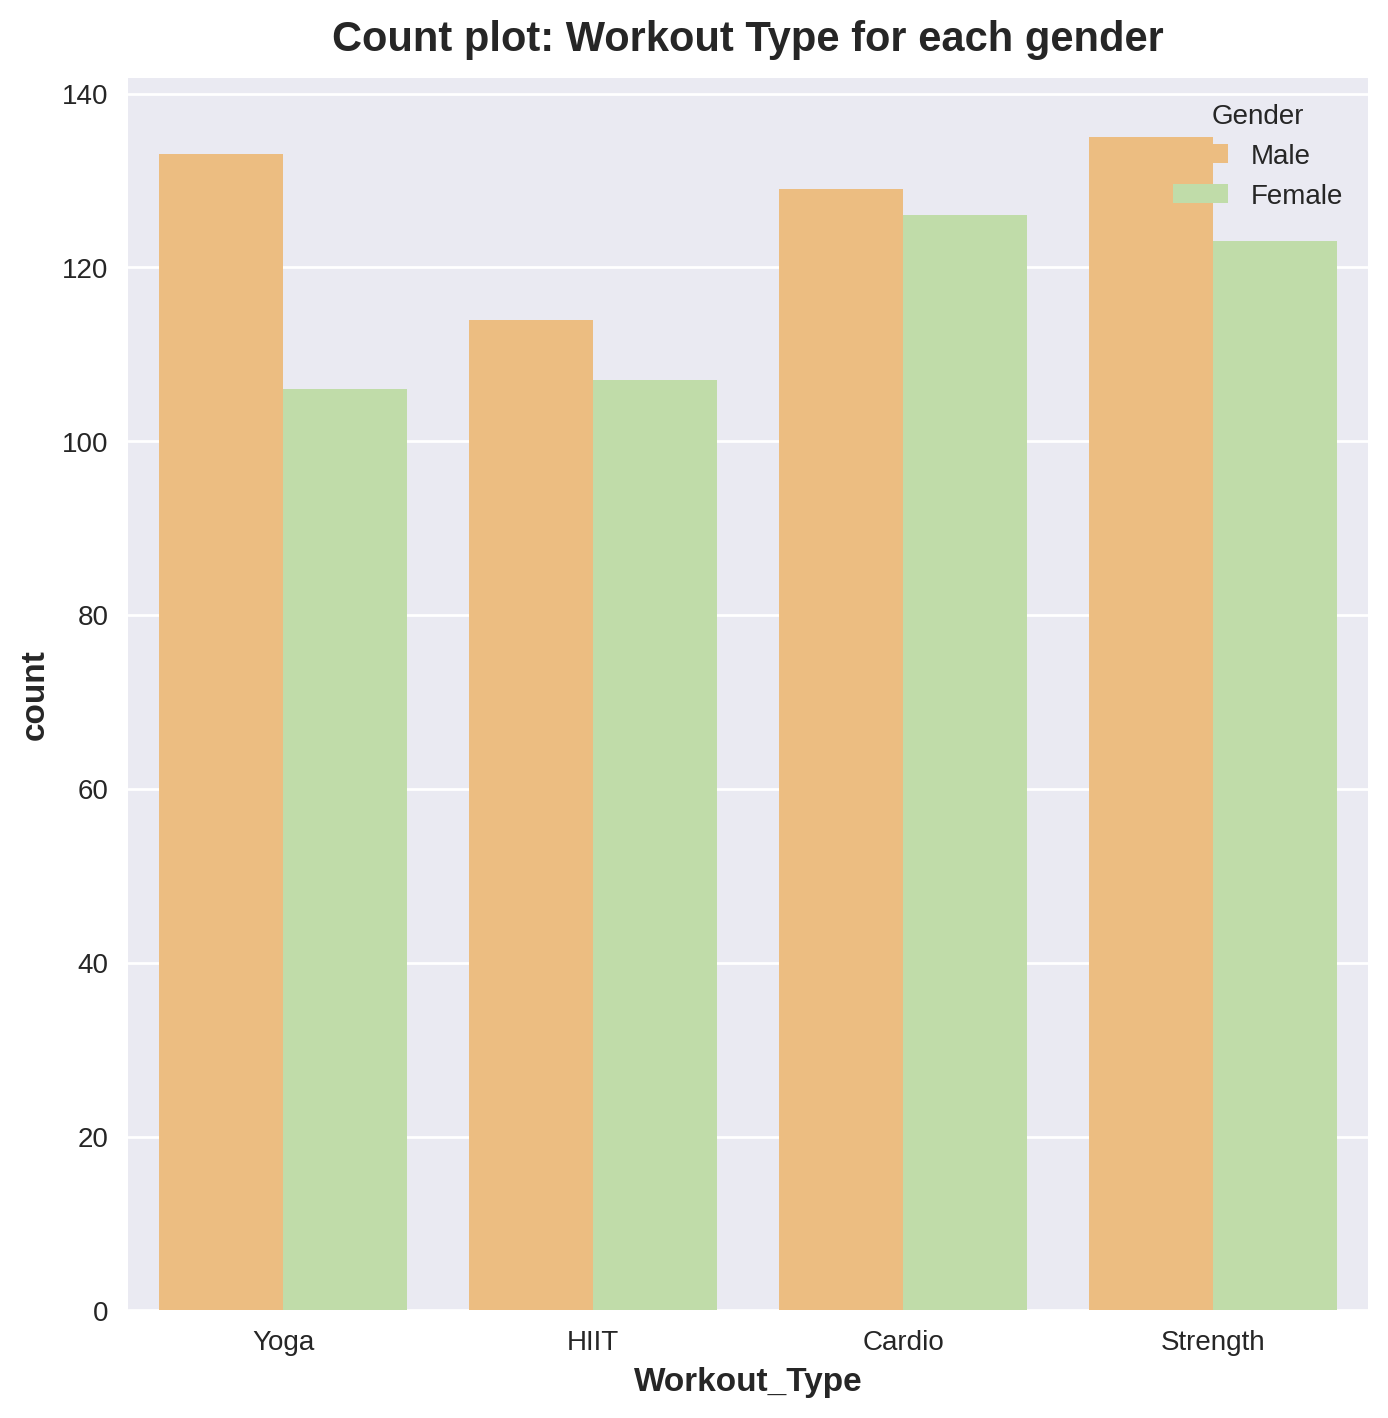

In [11]:
sns.countplot(x='Workout_Type', hue='Gender', palette='Spectral', data=df)
plt.title('Count plot: Workout Type for each gender')
plt.show()

Text(0.5, 1.0, 'Barplot: Workout Type influence on Calories Burned')

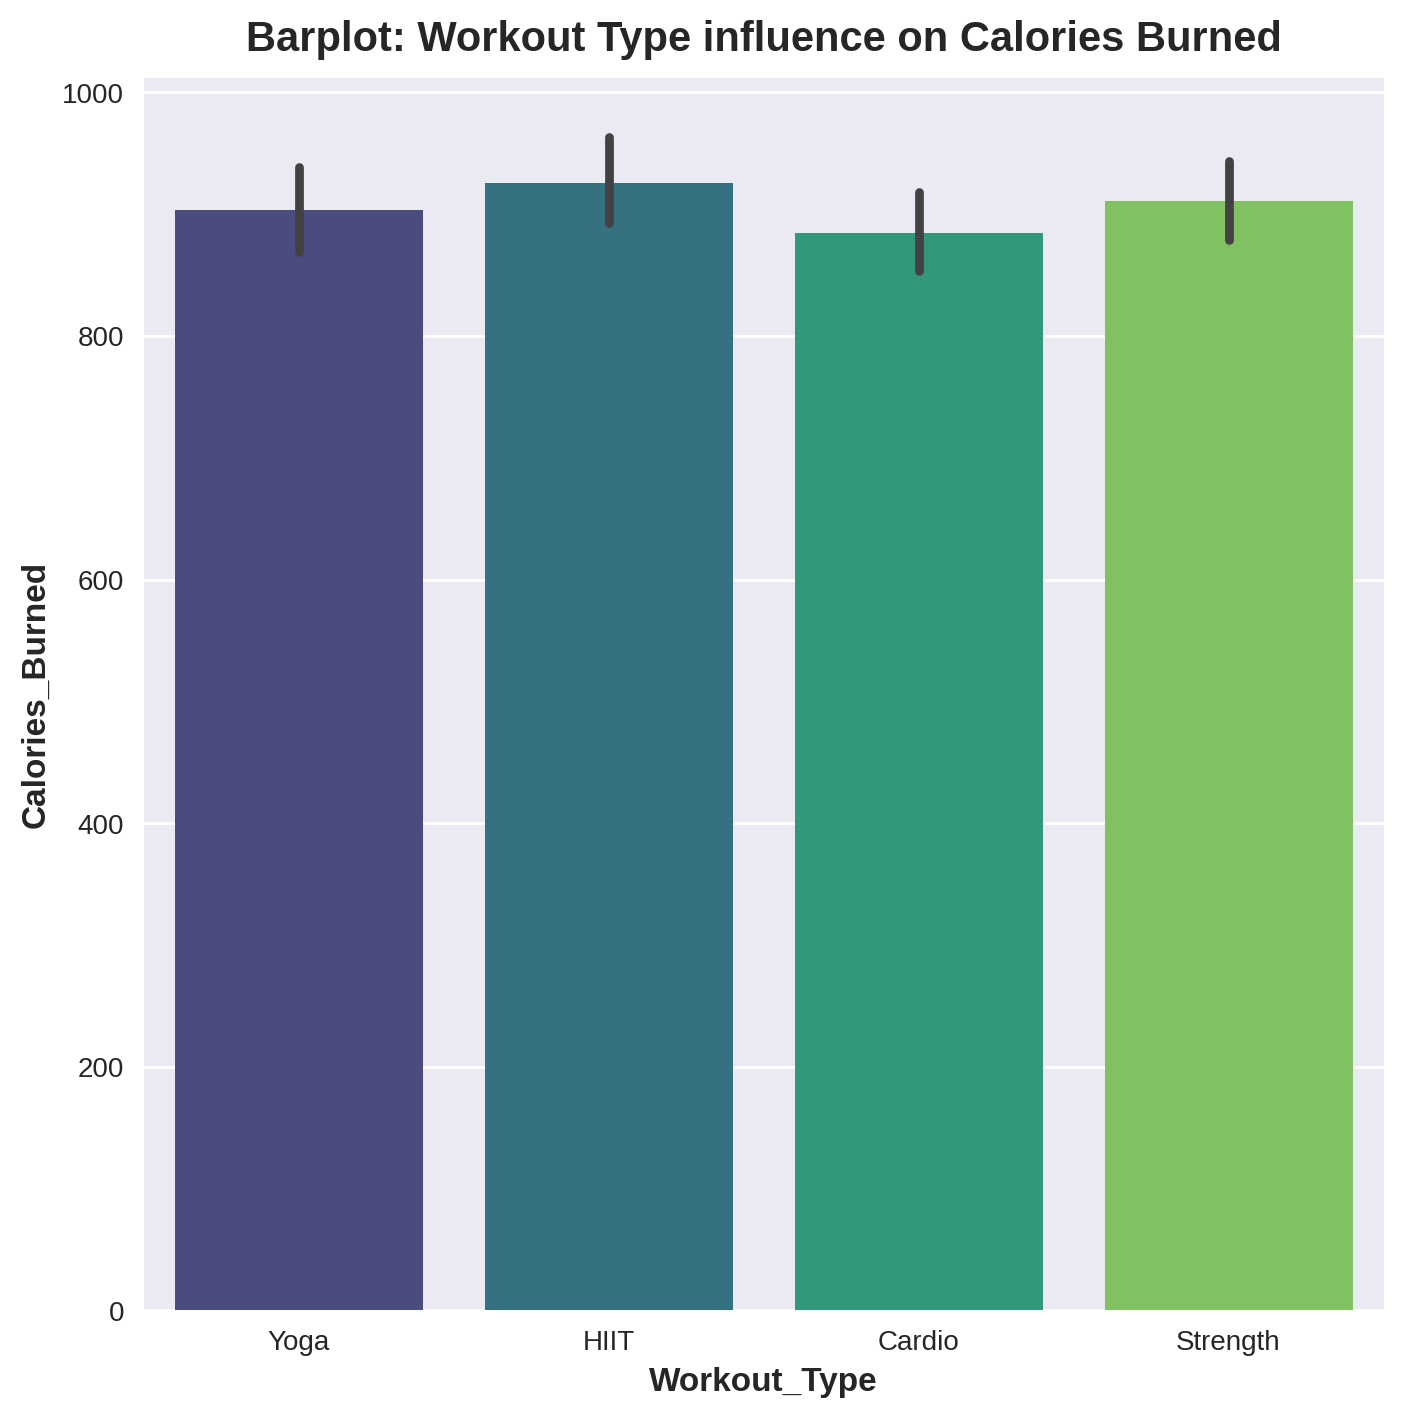

In [12]:
sns.barplot(x='Workout_Type', y='Calories_Burned', palette='viridis', data=df)
plt.title('Barplot: Workout Type influence on Calories Burned')

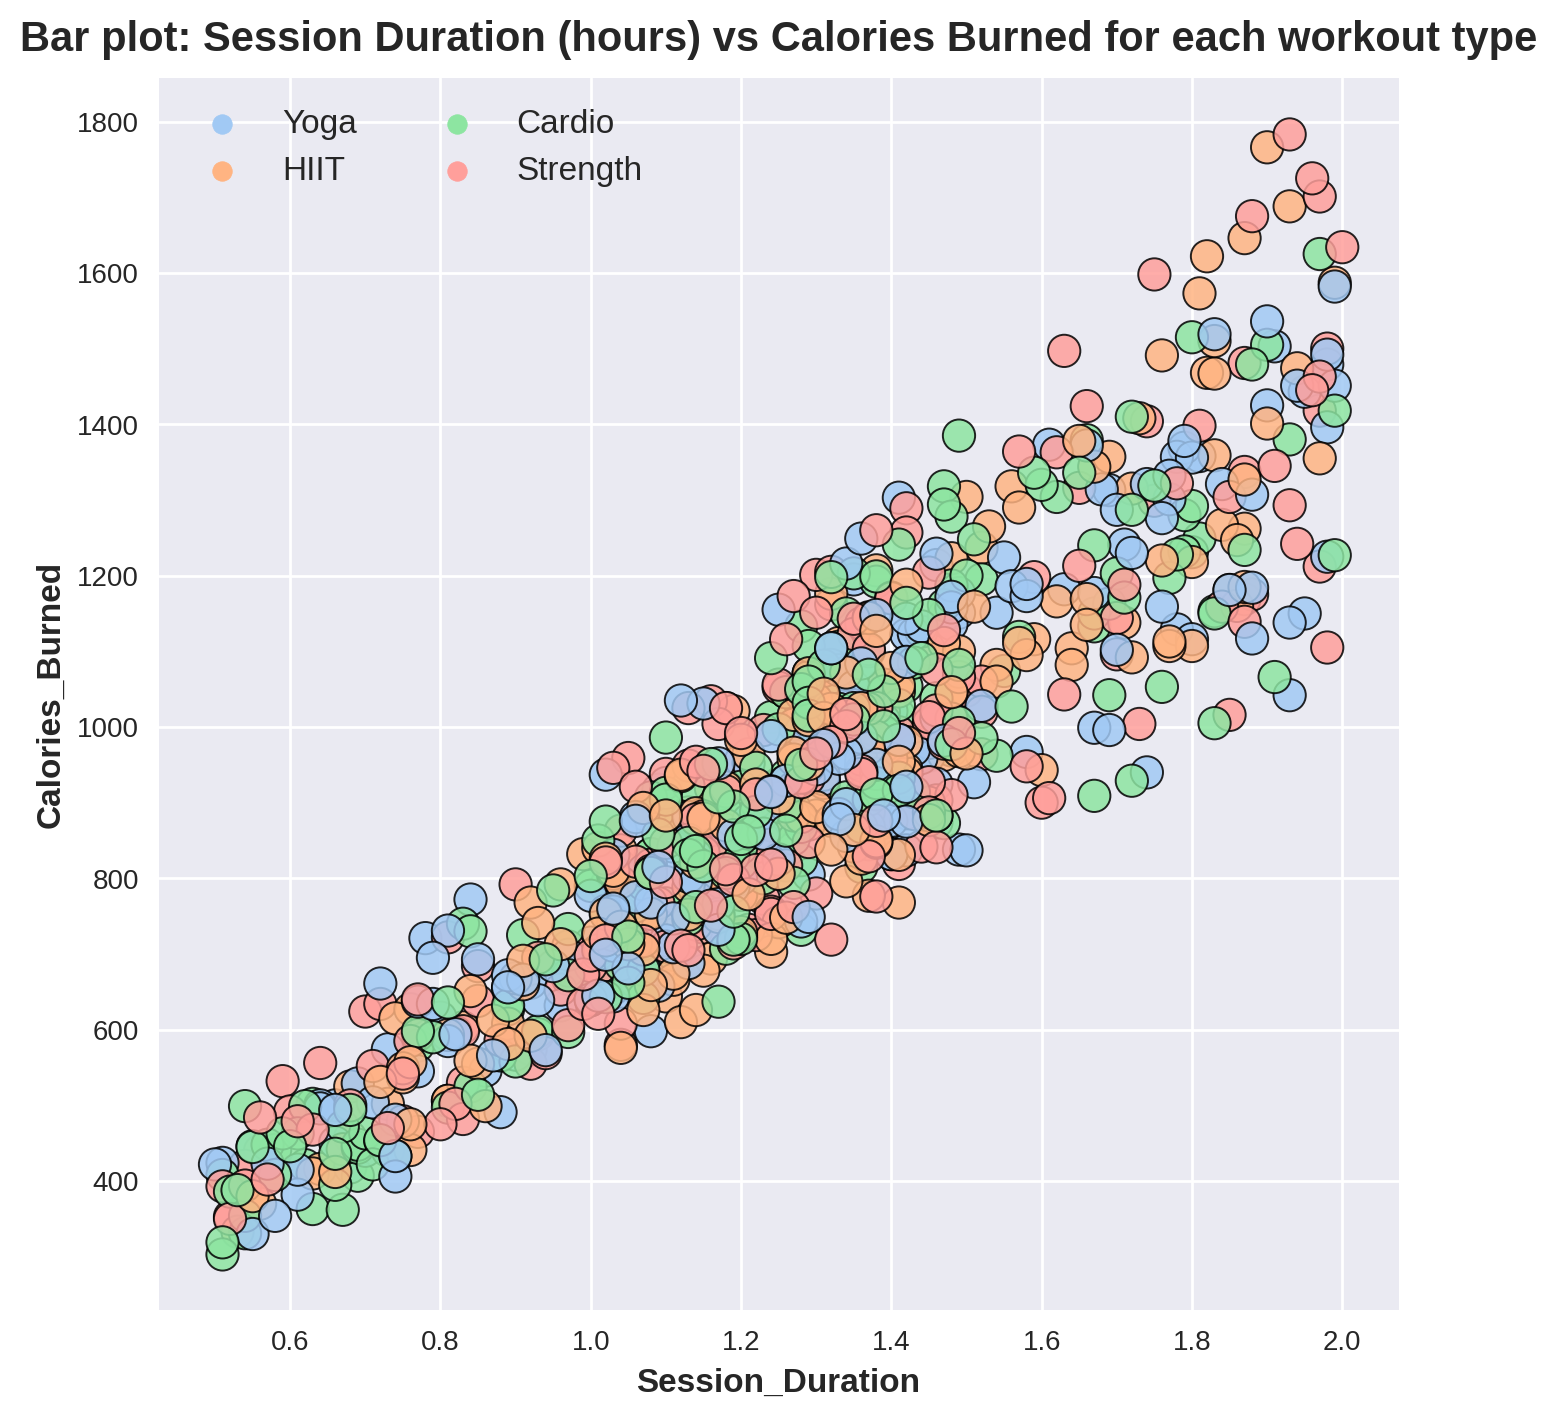

In [13]:
sns.scatterplot(x='Session_Duration', y='Calories_Burned', 
                data=df, hue='Workout_Type', palette='pastel', s=135, 
                edgecolor='black', linewidth=0.7, alpha=0.85)
plt.title("Bar plot: Session Duration (hours) vs Calories Burned for each workout type")
plt.legend(loc='upper left', fontsize='large', ncol=2)

The inferences we can make from the scatterplot is that there is a positive relationship between session duration and calories burned. The longer your session duration of the workout regardless of workout type, the more calories you burn.

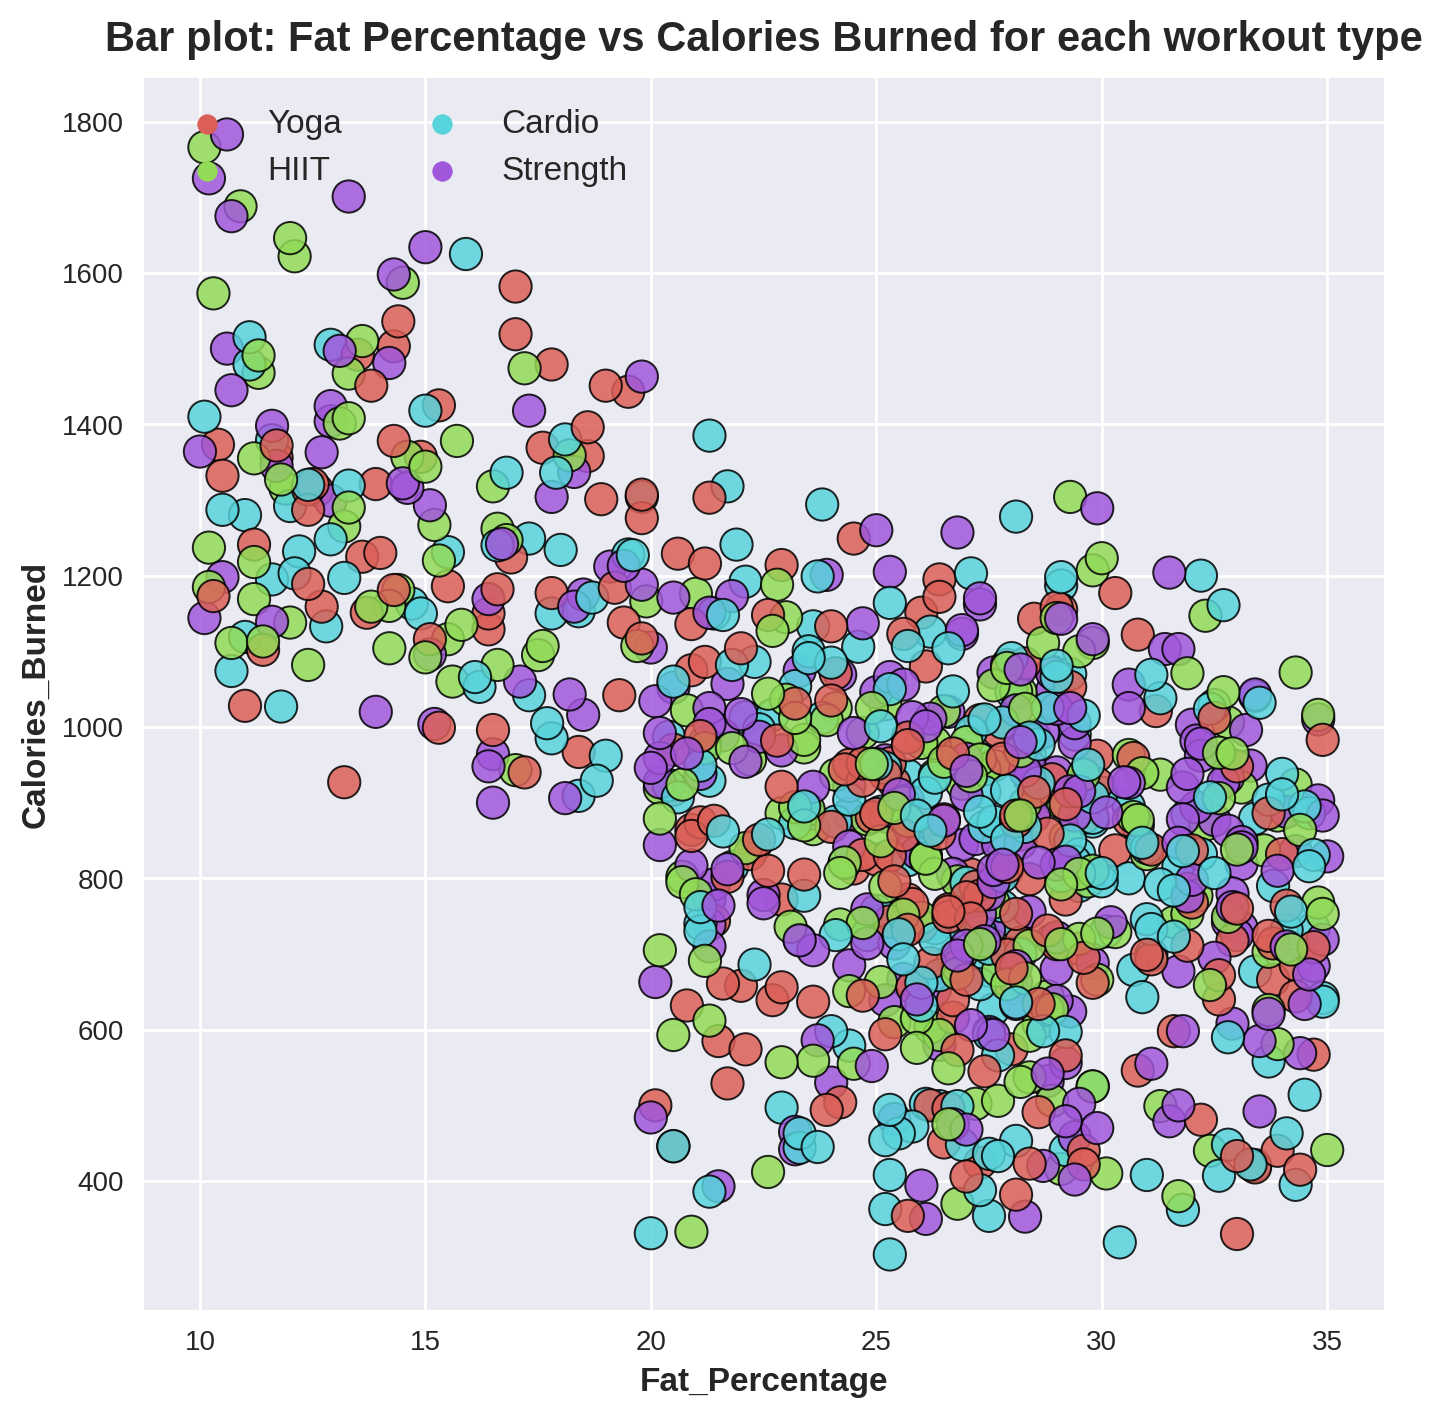

In [14]:
sns.scatterplot(x='Fat_Percentage', y='Calories_Burned', 
                data=df, hue='Workout_Type', palette='hls', s=135, 
                edgecolor='black', linewidth=0.7, alpha=0.85)
plt.title("Bar plot: Fat Percentage vs Calories Burned for each workout type")
plt.legend(loc='upper left', fontsize='large', ncol=2)

From the scatterplot above, we can deduce that there is a negative relationship between fat percentage and calories burned.

In [15]:
bin_edges = np.linspace(1.5, 3.7, num=4)

df['Water_Intake'] = pd.cut(df['Water_Intake'], bins=bin_edges, include_lowest=True, labels=False)

In [16]:
df.sample(10)

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
631   54    Male    86.5    1.76      189      158           68   
660   39  Female    50.3    1.61      167      128           50   
930   58  Female    59.3    1.58      166      165           56   
768   39    Male    71.7    1.88      198      147           51   
354   25    Male    76.5    1.96      180      120           59   
386   47  Female    68.7    1.76      161      137           66   
609   48    Male    87.1    1.76      183      156           67   
498   40    Male    60.2    1.88      183      141           61   
792   31    Male    70.2    1.98      199      129           61   
703   22  Female    48.7    1.76      165      167           66   

     Session_Duration  Calories_Burned Workout_Type  Fat_Percentage  \
631              1.48           1158.0         Yoga            29.0   
660              1.17            749.0         HIIT            32.8   
930              1.97           1463.0     Strength            19.8   
768              0.55            445.0       Cardio            23.7   
354              0.67            442.0     Strength            23.2   
386              1.37            845.0     Strength            27.7   
609              1.81           1398.0     Strength            11.6   
498              1.22            946.0       Cardio            25.2   
792              0.71            504.0         Yoga            24.2   
703              1.37           1144.0         HIIT            29.0   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  
631             2                  3                 2  27.92  
660             1                  2                 1  19.41  
930             1                  4                 3  23.75  
768             0                  2                 1  20.29  
354             1                  3                 1  19.91  
386             1                  3                 2  22.18  
609             2                  5                 3  28.12  
498             2                  3                 2  17.03  
792             1                  2                 1  17.91  
703             0                  4                 2  15.72

Text(0.5, 1.0, 'Interaction of Session and Water intake (litres) on calories burned')

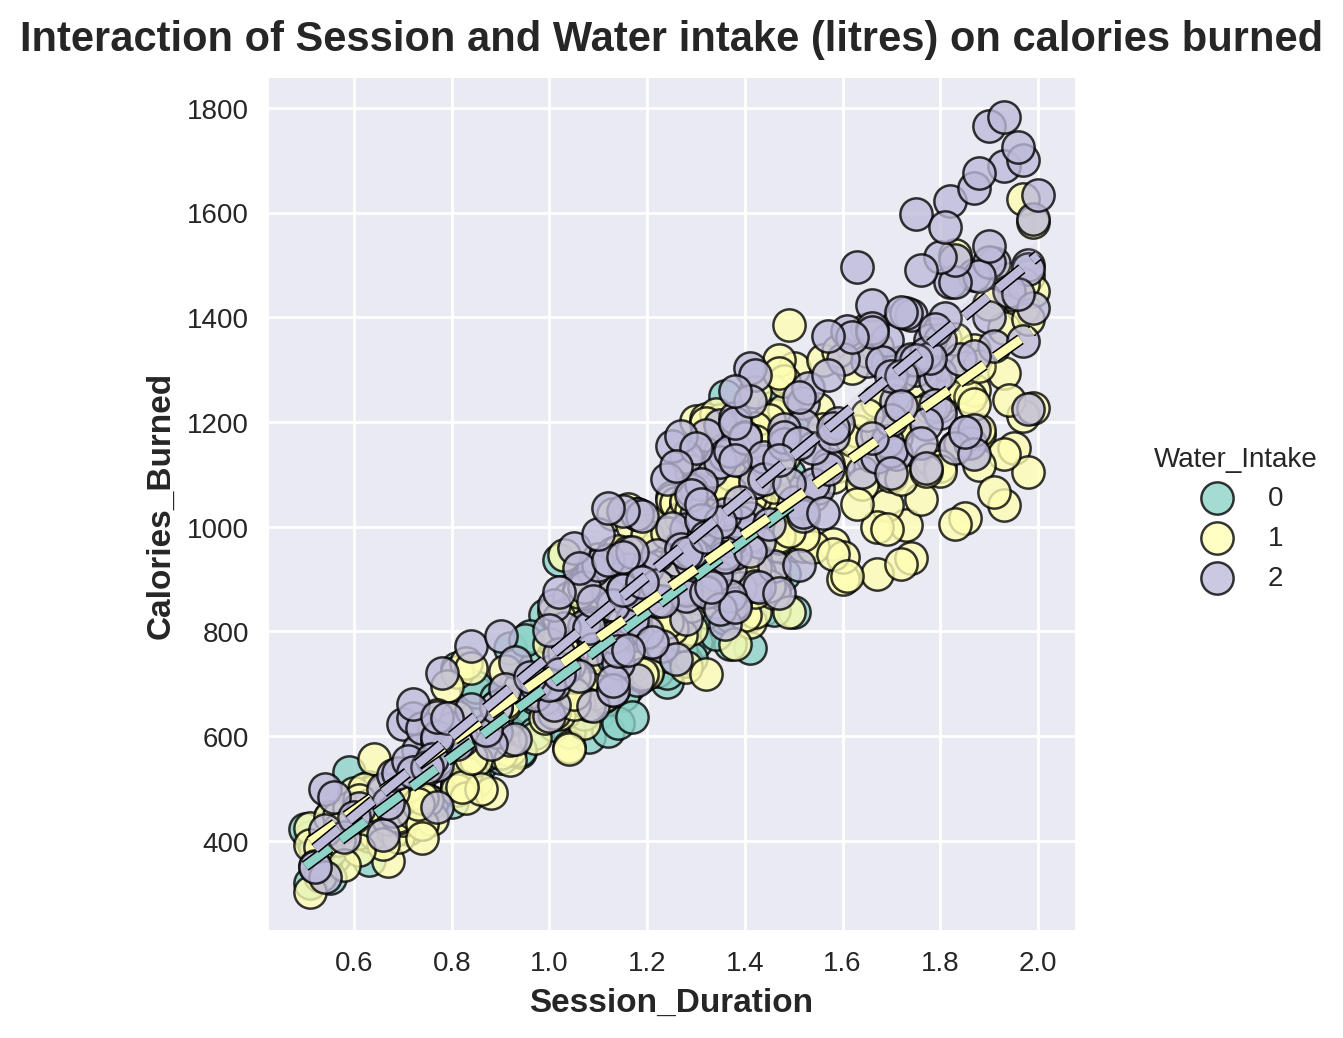

In [17]:
sns.lmplot(x='Session_Duration', y='Calories_Burned', hue='Water_Intake',
palette='Set3', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.9, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Session and Water intake (litres) on calories burned")

The inferences we can make from this lmplot is that the longer we can workout, the more water we intake while burning calories. We can notice that regression of water intake of 2 (interval between 2.96667 and 3.7 litres) is steeper than other intervals.

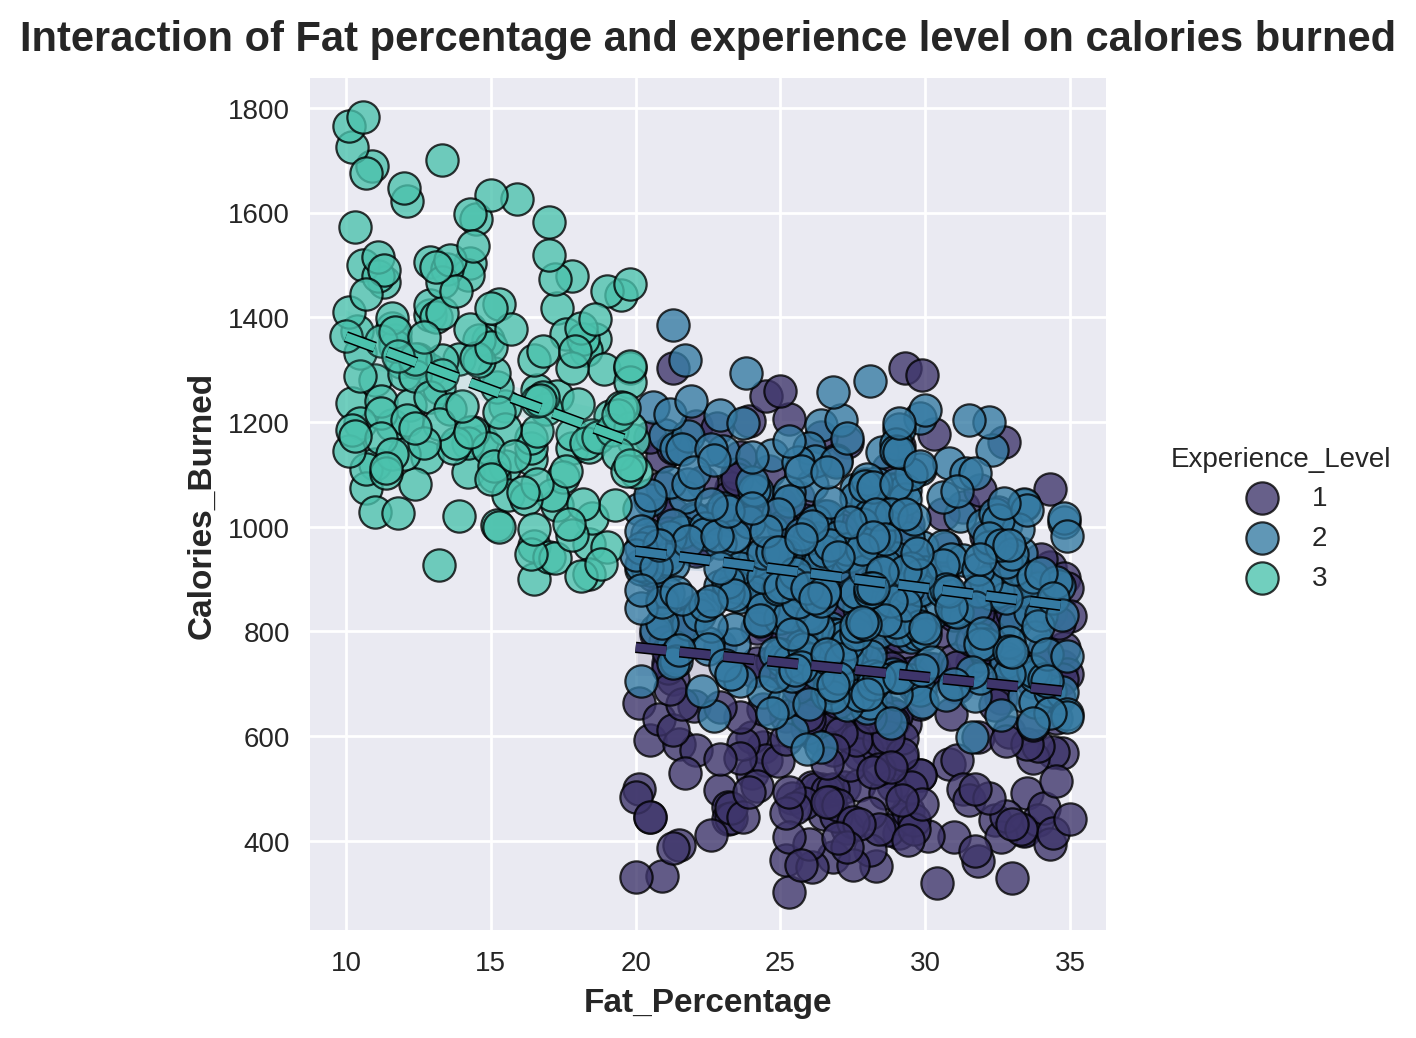

In [18]:
sns.lmplot(x='Fat_Percentage', y='Calories_Burned', hue='Experience_Level', palette='mako', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Fat percentage and experience level on calories burned")
plt.show()

As we can see from lmplot that people with more experience level, burn more calories. Since the regression line for experience level of 3 years has a steeper line as compare to other experience levels. Though lines of experience of 1 and 2 years are parallel to each other, but the line of 2 years is higher than line of 1 year. Thus, proving my inferences correct.

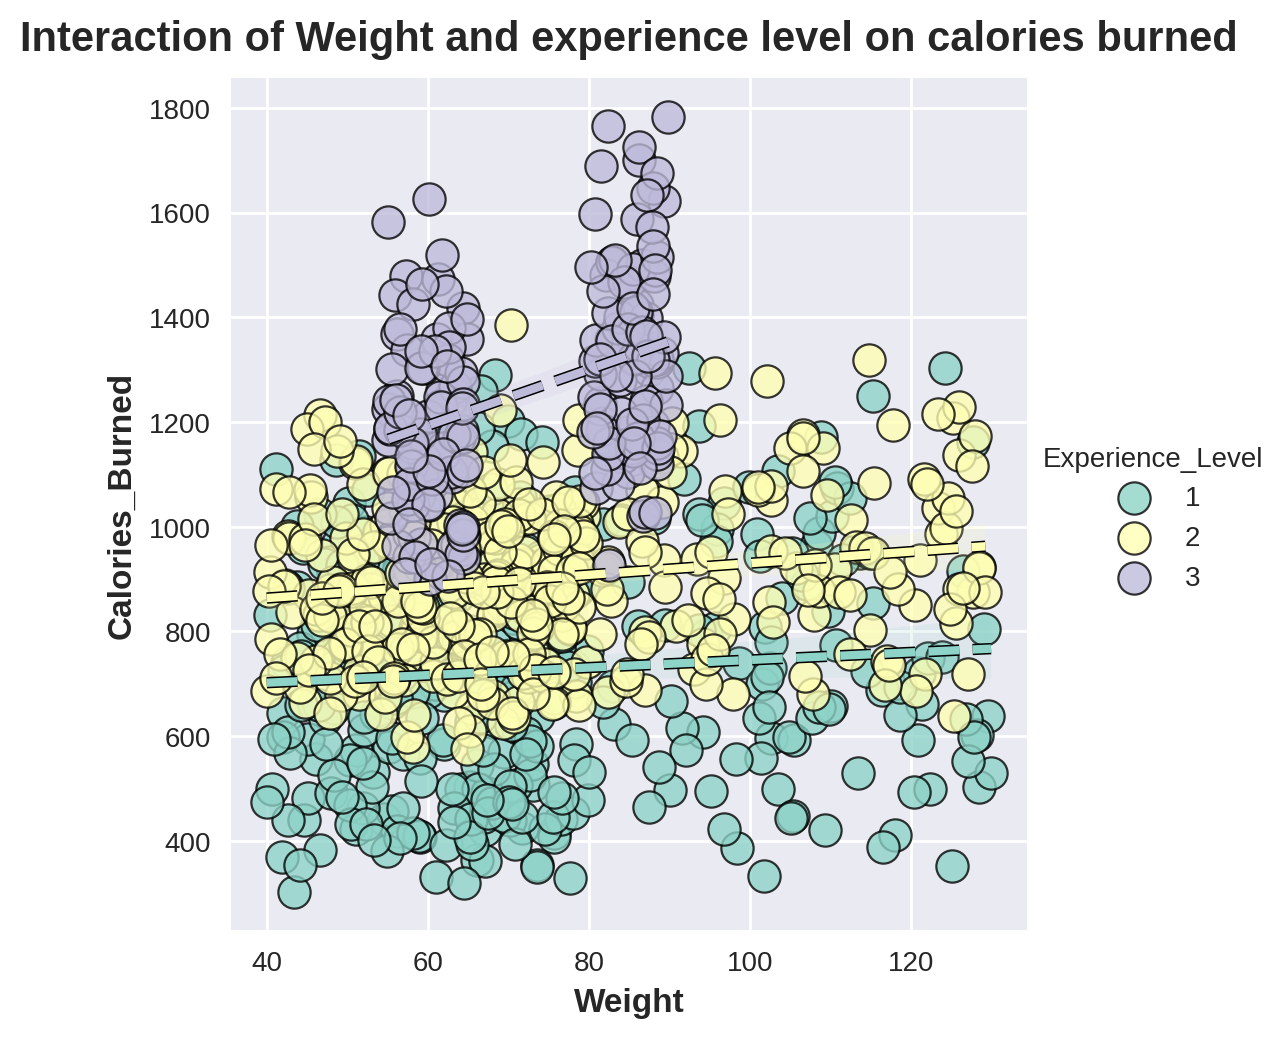

In [19]:
sns.lmplot(x='Weight', y='Calories_Burned', hue='Experience_Level', palette='Set3', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Weight and experience level on calories burned")
plt.show()

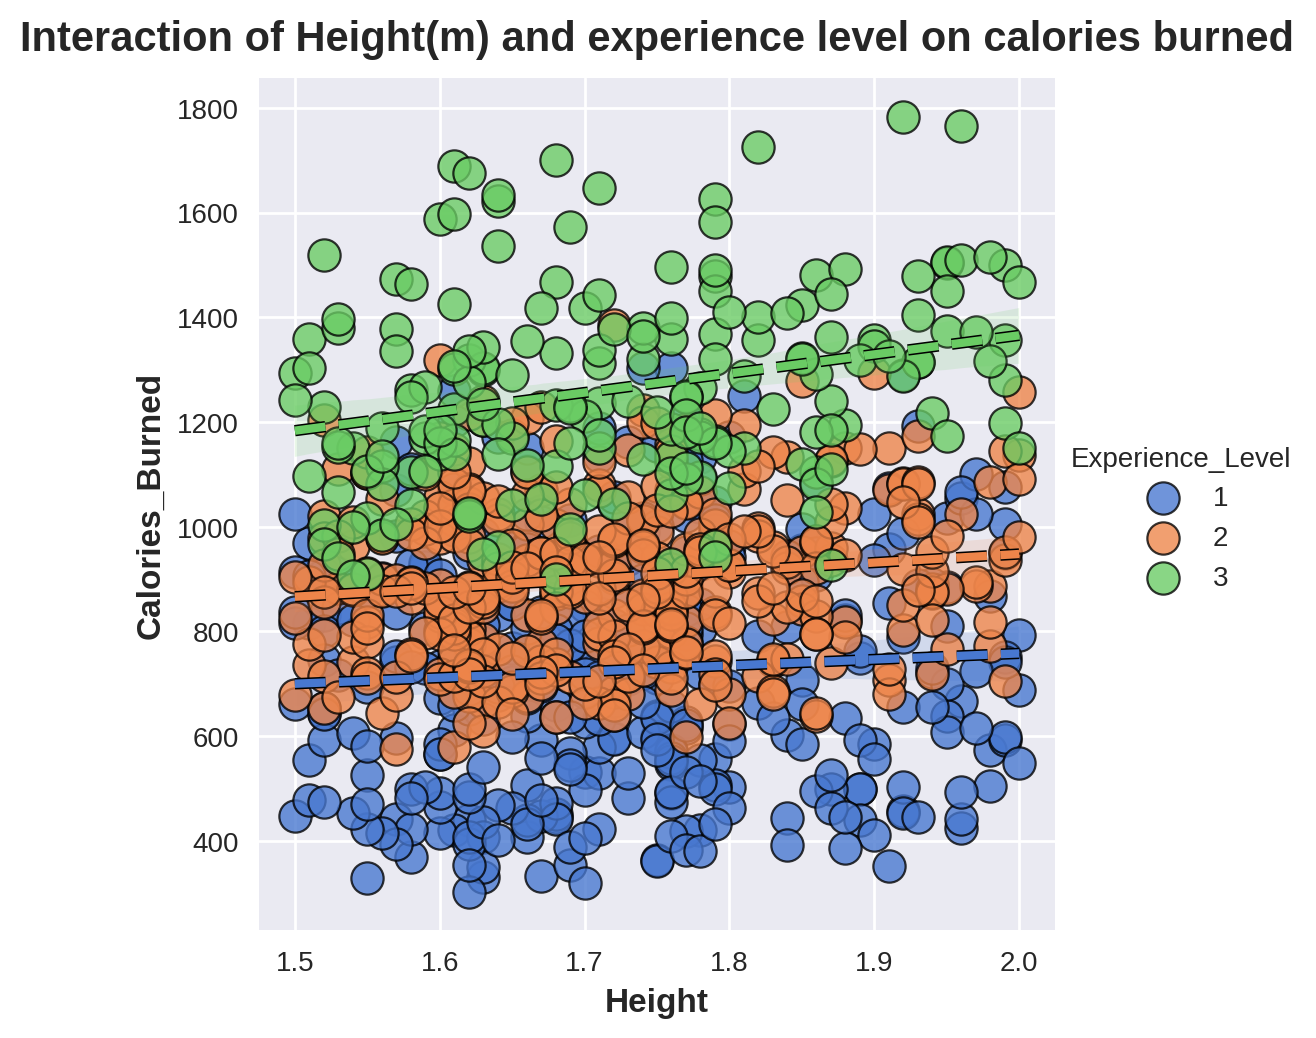

In [20]:
sns.lmplot(x='Height', y='Calories_Burned', hue='Experience_Level', palette='muted', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Height(m) and experience level on calories burned")
plt.show()

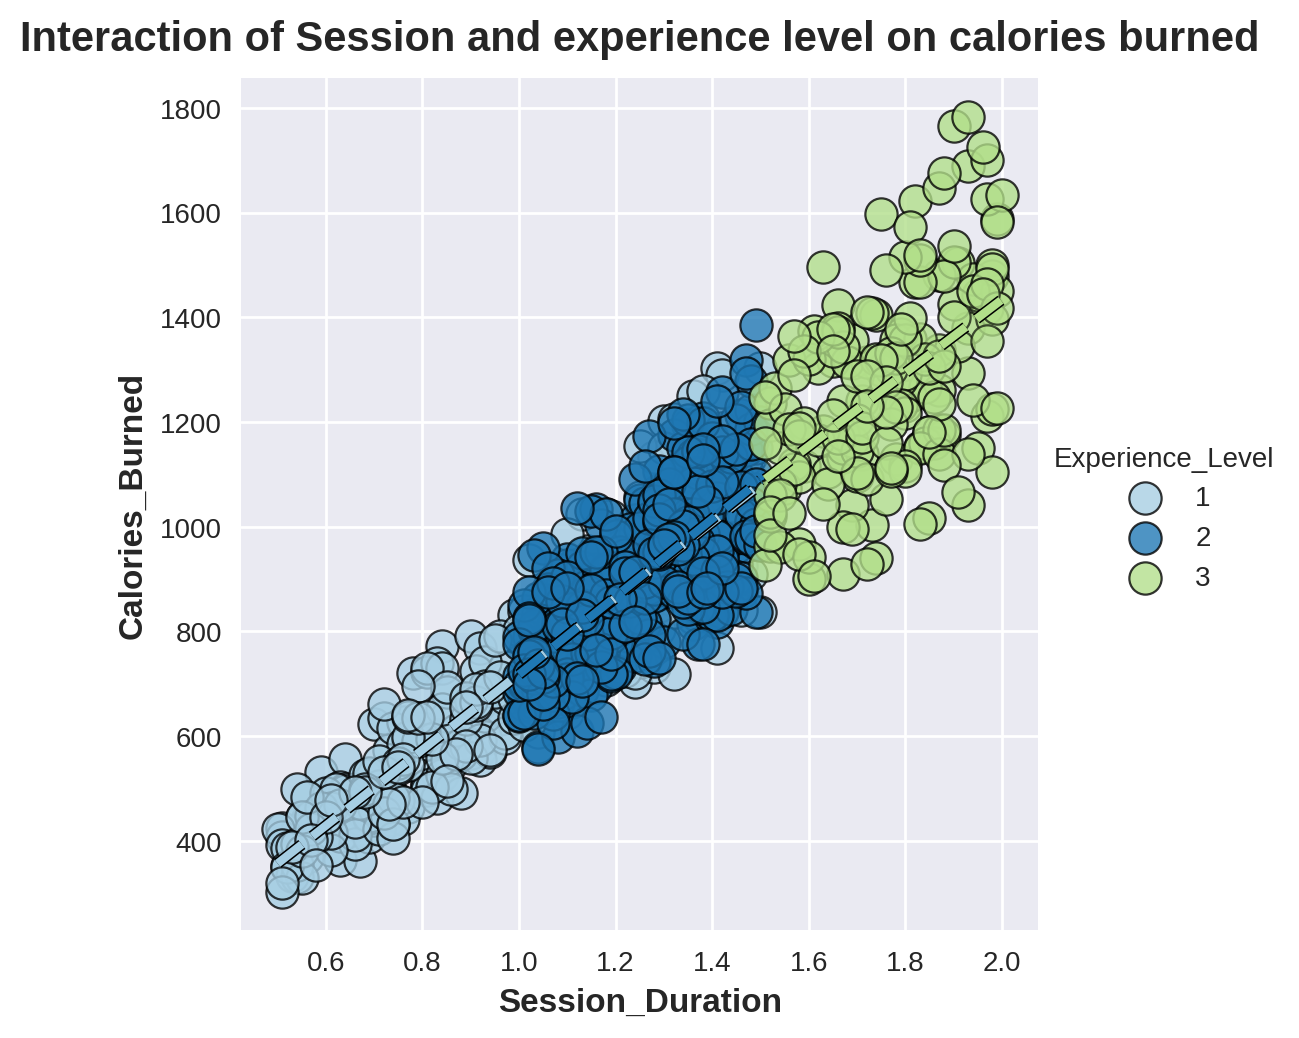

In [21]:
sns.lmplot(x='Session_Duration', y='Calories_Burned', hue='Experience_Level', palette='Paired', data=df, scatter_kws={'s':135, 'edgecolor':'black', 'linewidths':0.8, 'alpha':0.79},
           line_kws={'linewidth': 3,'linestyle': '--', 'path_effects': [pe.withStroke(linewidth=4.1, foreground='black')]})
plt.title("Interaction of Session and experience level on calories burned")
plt.show()

Since the lines are overlapping, there is no category effect of experience level on the relationship between session duration and calories burned. Therefore, the relationship between session duration and calories burned is consistent across all workout types.

In [22]:
df.columns

Index(['Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration', 'Calories_Burned', 'Workout_Type',
       'Fat_Percentage', 'Water_Intake', 'Workout_Frequency',
       'Experience_Level', 'BMI'],
      dtype='object')

## Feature engineering

In [23]:
epsilon = 1e-6
df['BMI_experience'] = df['BMI'] * df['Experience_Level']
df['Weight_experience'] = df['Weight'] * df['Experience_Level']
df['Height_experience'] = df['Height'] * df['Experience_Level']
df['fat_experience'] = df['Fat_Percentage'] * df['Experience_Level']
df['experience_fat_ratio'] = df['Experience_Level'] / (df['Fat_Percentage'] + epsilon)
df['session_water'] = df['Session_Duration'] * df['Water_Intake']
